In [0]:
# Basic
import numpy as np
import pandas as pd
import sys
import scipy
import sklearn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Short introduction of variables in the dataset
**Purpose: prediction of whether have High-Density Lipoprotein Cholesterol or not**

The dataset is from the third wave of The Nord-Trøndelag Health Study.It is a unique database of questionnaire data, clinical measurements and samples from a county’s inhabitants from 1984 onwards. https://www.ntnu.edu/hunt


*   Sex :women/men (0/1)
*   BMI  :        Body Mass Index


*   tri  :            Triglycerides 
*   CRP :         Serum micro C-reactive protein 


*   age  :         Age at participation at the start of the health survey
*   dia  :          Diabetes diagnosis ( 0: No;1: Yes)

*   smok :       Smoking status ( 0: Never smoked; 1:Ex smoker; 2:  Current smoker; 3:Occasionally smoker)
*   hdl  :          High-Density Lipoprotein Cholesterol(whether reached the level for dianosis of metabolic syndrome). ( 0: No;1: Yes)



*  phy   :       Level of physical activity ( 0:inactive; 1:active)
*  alcohol:    Alcohol consumption  ( 0:  abstainers; 1:Light drinkers; 2:  Moderate drinkers; 3:Heavy drinkers) 
















In [3]:
#Load local data files to Colaboratory

from google.colab import files

uploaded = files.upload()


Saving diab.csv to diab.csv


In [4]:
# show the keys to access what I just uploaded.
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "diab.csv" with length 2993484 bytes


In [26]:
df = pd.read_csv("diab.csv")
df.head(2)

,Unnamed: 0,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,1,Female,23.7,1.3,1.3,72.1,No,Never smoked,no,active,Light drinkers
1,2,Female,27.3,2.3,3.2,74.6,No,Ex smoker,yes,active,abstainers


**Data Pre-Processing**

In [27]:
df.Sex[df.Sex == 'Female'] = 0
df.Sex[df.Sex == 'Male']   = 1

df.dia[df.dia == 'No'] = 0
df.dia[df.dia == 'Yes'] = 1

df.smok[df.smok == 'Never smoked'] = 0
df.smok[df.smok == 'Ex smoker'] = 1
df.smok[df.smok == 'Current smoker'] = 2
df.smok[df.smok == 'Occasionally smoker'] = 3

df.hdl[df.hdl == 'no'] = 0
df.hdl[df.hdl == 'yes'] = 1

df.phy[df.phy == 'inactive'] = 0
df.phy[df.phy == 'active'] = 1

df.alcohol[df.alcohol == 'abstainers'] = 0
df.alcohol[df.alcohol == 'Light drinkers'] = 1
df.alcohol[df.alcohol == 'Moderate drinkers'] = 2
df.alcohol[df.alcohol == 'Heavy drinkers'] = 3

df.head()

,Unnamed: 0,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,1,0,23.7,1.3,1.3,72.1,0,0,0,1,1
1,2,0,27.3,2.3,3.2,74.6,0,1,1,1,0
2,3,0,20.7,0.6,0.2,59.4,0,0,0,1,1
3,4,1,31.6,1.1,3.8,69.6,0,2,0,1,1
4,5,0,32.1,1.4,4.8,42.0,0,0,1,1,1


In [28]:
# Rename unnamed column 

df.rename( columns={'Unnamed: 0':'id'}, inplace=True )

# delete id column
del df['id']
df.head()

,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,0,23.7,1.3,1.3,72.1,0,0,0,1,1
1,0,27.3,2.3,3.2,74.6,0,1,1,1,0
2,0,20.7,0.6,0.2,59.4,0,0,0,1,1
3,1,31.6,1.1,3.8,69.6,0,2,0,1,1
4,0,32.1,1.4,4.8,42.0,0,0,1,1,1


In [10]:
#check number of rows and columns in dataset
df.shape

(35049, 10)

In [8]:
#check the types of each column 
df.dtypes

Sex         object
BMI        float64
tri        float64
CRP        float64
age        float64
dia         object
smok        object
hdl         object
phy         object
alcohol     object
dtype: object

In [0]:
#Convert String Column to Numeric

cols = ['Sex','dia', 'smok', 'hdl', 'phy', 'alcohol']  # We don't want to convert the Final grade column.
for col in cols:  # Iterate over chosen columns
	df[col] = pd.to_numeric(df[col])

**Data Exploration**

In [0]:
df.describe()

,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
count,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000
mean,0.439756,27.150036,1.623088,2.635228,53.068638,0.042483,0.879882,0.295301,0.799310,1.017147
std,0.496364,4.372168,0.991354,5.535303,15.038895,0.201692,0.928638,0.456184,0.400523,0.662455
min,0.000000,12.100000,0.200000,0.000000,19.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.100000,1.000000,0.600000,42.200000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,26.600000,1.400000,1.200000,53.700000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,29.600000,2.000000,2.700000,63.700000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,55.000000,22.600000,160.100000,96.900000,1.000000,3.000000,1.000000,1.000000,3.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35049 entries, 0 to 35048
Data columns (total 10 columns):
Sex        35049 non-null int64
BMI        35049 non-null float64
tri        35049 non-null float64
CRP        35049 non-null float64
age        35049 non-null float64
dia        35049 non-null int64
smok       35049 non-null int64
hdl        35049 non-null int64
phy        35049 non-null int64
alcohol    35049 non-null int64
dtypes: float64(4), int64(6)
memory usage: 2.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76218f93c8>,
      dtype=object)

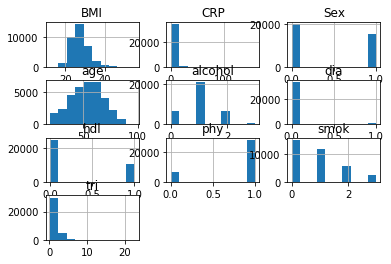

In [71]:
# histogram :representation of the distribution of numerical data
df.hist()

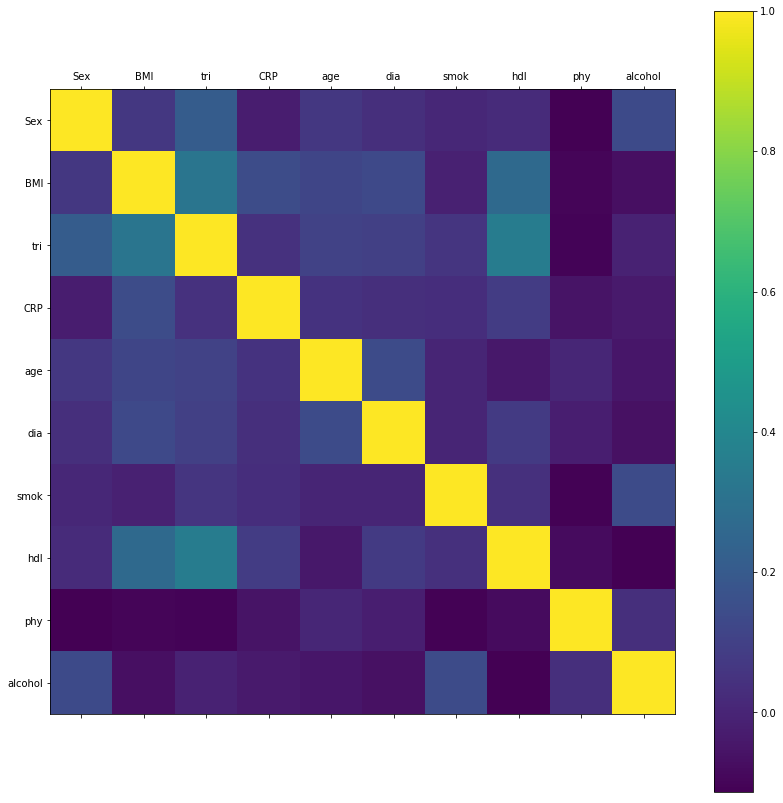

In [73]:
#correlation matrix showing correlation coefficients between variables.

rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

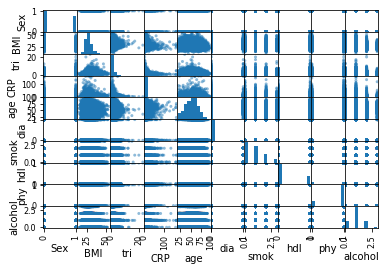

In [0]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

In [0]:
#  scale  dataset.
standardScaler = StandardScaler()
columns_to_scale = ['BMI', 'CRP', 'age', 'tri']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [0]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


**Description of chosen methods.** 




*  K-Nearest Neighbors. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


* Logistic regression produces a logistic curve, which is limited to values between 0 and 1.Logistic regression is similar to a linear regression, but the curve is constructed using the natural logarithm of the “odds” of the target variable, rather than the probability. Moreover, the predictors do not have to be normally distributed or have equal variance in each group.









**What parameters are important to optimize for the chosen ML methods?**


1. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.
2.   

**Which performance measures are used?**
Accuracy score: one metric for evaluating classification models.Accuracy is the fraction of predictions our model got right. 



In [0]:
array = df.values
X = array[:,0:7]
y = array[:,7]


**K-Fold Cross Validation**

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As a general rule and empirical evidence, K = 5 or 10 is generally preferred.


**K nearest neighbors**

In [16]:
#In order to train and test our model using cross-validation, 
#I will use the ‘cross_val_score’ function with a cross-validation value of 5. 
#‘cross_val_score’ takes in the k-NN model and the data as parameters. 
# Then it splits the data into 5 groups and fits and scores the data 5 seperate times, 
# recording the accuracy score in an array each time. 
# Then save the accuracy scores in the ‘cv_scores’ variable.
from sklearn.model_selection import cross_val_score

#create a KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) 
print(cv_scores)

[0.70085592 0.7192582  0.70998573 0.71027104 0.70594949]


In [17]:
# find the average of the 5 scores
ave_knn = np.mean(cv_scores)
print(ave_knn)

0.7092640784448931


Using KNN methond, the mean score is about 70.93%. 

** Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

In [34]:
print(accuracy)
print(parameters)

0.7473251733287682
[[-0.25860878  0.09021289  0.8172268   0.02005122 -0.01775169  0.47464121
   0.06005521]]


In [0]:
from sklearn.model_selection import KFold
cv= model_selection.KFold(n_splits=5, random_state=None)

In [69]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
results=model_selection.cross_val_score(logreg,X,y,cv=kfold)
print(results)

[0.74279601 0.74778887 0.75135521 0.74564907 0.74818091]


In [70]:
print("Accuracy:", results.mean()*100)

Accuracy: 74.71540137206921


Using logistic regression methond, the mean score is about 74.72%, which is better than KNN method.